In [1]:
import rasterio
from rasterio.plot import show
import os.path
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
# function to convert txt into array of dataset --> returns array and size of data
def create_data (file, Class):
    
    arr = []
    x = -1
    for line in file:
        x = x+1
        if (x == 0):
            continue
        
        a = line.strip().split()
        for i in range(len(a)-5):
            arr.append(a[i+4])
        arr.append(Class)
    
    return arr, x

# inp is input array and count is the count of data
inp = []
count = 0    


# Vegetation
file = open(r'veg1.txt')
arr, x = create_data(file,1)
inp += arr
count += x

# Barren Land
file = open(r'non-veg1.txt')
arr, x = create_data(file,0)
inp += arr
count += x

print(count)
a = np.array(inp)
inp = a.reshape(count,15)
inp

786


array([['0.0382', '0.0416', '0.0688', ..., '0.7155222', '-0.3122931',
        '1'],
       ['0.0382', '0.0402', '0.0695', ..., '0.7237716', '-0.35123882',
        '1'],
       ['0.0382', '0.0402', '0.0695', ..., '0.7237716', '-0.35123882',
        '1'],
       ...,
       ['0.0739', '0.0892', '0.123', ..., '0.21564591', '0.12046175',
        '0'],
       ['0.0733', '0.0934', '0.1308', ..., '0.19681276', '0.11837216',
        '0'],
       ['0.0733', '0.0932', '0.1286', ..., '0.20379147', '0.11119754',
        '0']], dtype='<U13')

In [3]:
DF = pd.DataFrame(inp)
 
# save the dataframe as a csv file
DF.to_csv("data1.csv")
DF.columns =['B1', 'B2' ,'B3', 'B4','B5', 'B6','B7', 'B8','B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDBI', 'Out']

DF.head(1000)

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDBI,Out
0,0.0382,0.0416,0.0688,0.0493,0.09,0.2364,0.2892,0.2973,0.3125,0.3283,0.1558,0.0785,0.7155222,-0.3122931,1
1,0.0382,0.0402,0.0695,0.052,0.09,0.2364,0.2892,0.3245,0.3125,0.3283,0.1558,0.0785,0.7237716,-0.35123882,1
2,0.0382,0.0402,0.0695,0.052,0.09,0.2364,0.2892,0.3245,0.3125,0.3283,0.1558,0.0785,0.7237716,-0.35123882,1
3,0.0335,0.0385,0.0618,0.0492,0.0876,0.2438,0.3001,0.2909,0.331,0.3283,0.1623,0.0842,0.71067333,-0.2837599,1
4,0.0335,0.0398,0.0628,0.0508,0.0876,0.2438,0.3001,0.3188,0.331,0.3283,0.1623,0.0842,0.7251082,-0.3252962,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,0.0728,0.1186,0.1682,0.1904,0.221,0.2712,0.2921,0.308,0.3103,0.318,0.3381,0.296,0.23595504,0.0465872,0
782,0.0739,0.0985,0.1444,0.1586,0.1914,0.2243,0.2373,0.268,0.2514,0.2771,0.3009,0.2622,0.25644633,0.05783091,0
783,0.0739,0.0892,0.123,0.1524,0.1914,0.2243,0.2373,0.2362,0.2514,0.2771,0.3009,0.2622,0.21564591,0.12046175,0
784,0.0733,0.0934,0.1308,0.1512,0.1718,0.2063,0.2253,0.2253,0.2471,0.2771,0.2858,0.2481,0.19681276,0.11837216,0


In [4]:
from sklearn.svm import SVC

X = DF.drop('Out',axis = 1)
Y = DF['Out']

model1 = SVC(kernel = 'linear', decision_function_shape='ovr')
model2 = SVC(kernel = 'poly', decision_function_shape='ovr')
model3 = SVC(kernel = 'rbf', decision_function_shape='ovo')
model4 = SVC(kernel = 'rbf', decision_function_shape='ovr')

model1.fit(X,Y)
model2.fit(X,Y)
model3.fit(X,Y)
model4.fit(X,Y)

SVC()

In [5]:
pred1 = model1.predict(X)
pred2 = model2.predict(X)
pred3 = model3.predict(X)
pred4 = model4.predict(X)

from sklearn.metrics import accuracy_score,confusion_matrix

print(accuracy_score(pred1,Y))
print(accuracy_score(pred2,Y))
print(accuracy_score(pred3,Y))
print(accuracy_score(pred4,Y))

0.9936386768447837
1.0
0.9961832061068703
0.9961832061068703


In [6]:
print(confusion_matrix(Y, pred1))
print(confusion_matrix(Y, pred2))
print(confusion_matrix(Y, pred3))
print(confusion_matrix(Y, pred4))

[[305   5]
 [  0 476]]
[[310   0]
 [  0 476]]
[[307   3]
 [  0 476]]
[[307   3]
 [  0 476]]


In [7]:
img2 = rasterio.open("Subset_20221021.tif")
z2 = img2.read()

z2.shape

(15, 124, 116)

In [8]:


inp2 = []
for i in range(124):
    for j in range(116):
        for k in range(14):
            inp2.append(z2[k,i,j])
        #inp.append(ndvi[i,j])

print(len(inp2))

a = np.array(inp2)
inp2 = a.reshape(124*116,14)
inp2.shape

201376


(14384, 14)

In [9]:
import pandas as pd
DF2 = pd.DataFrame(inp2)
 
# save the dataframe as a csv file
DF2.to_csv("data2.csv")
DF2.columns =['B1', 'B2' ,'B3', 'B4','B5', 'B6','B7', 'B8','B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDBI',]

DF2.head(15)

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDBI
0,0.0660,0.0806,0.1138,0.1118,0.1596,0.2414,0.2633,0.2677,0.2902,0.2897,0.2317,0.1620,0.410804,-0.072086
1,0.0660,0.0746,0.1034,0.1001,0.1596,0.2414,0.2633,0.2403,0.2902,0.2897,0.2317,0.1620,0.411868,-0.018220
2,0.0684,0.0786,0.0988,0.0950,0.1393,0.2598,0.2860,0.2686,0.3082,0.2784,0.2164,0.1399,0.477448,-0.107629
3,0.0684,0.0661,0.0907,0.0819,0.1393,0.2598,0.2860,0.3082,0.3082,0.2784,0.2164,0.1399,0.580108,-0.174990
4,0.0692,0.0706,0.0980,0.0930,0.1539,0.2606,0.2932,0.3208,0.3154,0.2784,0.2218,0.1526,0.550507,-0.182455
5,0.0692,0.0904,0.1246,0.1238,0.1539,0.2606,0.2932,0.2719,0.3154,0.2784,0.2218,0.1526,0.374273,-0.101479
6,0.0678,0.1338,0.1576,0.1682,0.1912,0.2442,0.2486,0.2546,0.2680,0.2784,0.2303,0.1695,0.204352,-0.050113
7,0.0678,0.1340,0.1532,0.1600,0.1912,0.2442,0.2486,0.2423,0.2680,0.2784,0.2303,0.1695,0.204574,-0.025391
8,0.0678,0.1340,0.1532,0.1600,0.1912,0.2442,0.2486,0.2423,0.2680,0.2784,0.2303,0.1695,0.204574,-0.025391
9,0.0646,0.0814,0.1028,0.1066,0.1570,0.2152,0.2376,0.2414,0.2640,0.2748,0.2375,0.1664,0.387356,-0.008144


In [10]:
pred_22 = model2.predict(DF2)
pred_22

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

0 0


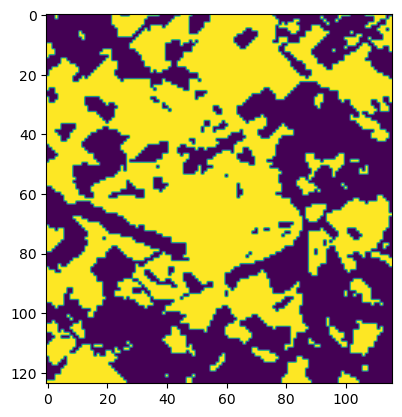

<AxesSubplot:>

In [12]:
a = np.array(pred_22)
pred_22 = a.reshape(124,116)

img = np.array(pred_22, dtype=np.uint8)
type(img[0,0])
img = img*255

print(img[0,40],pred_22[0,40])
#print(img[25,0],pred_22[150,0])
#print(img[0,6],pred_22[0,6])

img3 = Image.fromarray(img)
img3.save('22_14band.png')
show(img3)